In [1]:
import os
os.chdir('../..')
os.getcwd()

'/Users/sbokupripeku/git/work/examples/costly_nonstationary_bandits'

In [2]:
%load_ext autoreload
%autoreload 2

import pickle
import matplotlib.pyplot as plt

import algorithms
import costs
import evaluation
import dataset
from plotting.average_ctr import get_average_ctr_plot

In [3]:
%%time
import gc

with open("dataset/R6/subsample/data_04.pickle", "rb") as f:
    gc.disable()
    data = pickle.load(f)
    gc.enable()

CPU times: user 3.58 s, sys: 1.65 s, total: 5.24 s
Wall time: 21.2 s


In [4]:
NUM_OF_TRIALS = None

In [5]:
p_random = algorithms.RandomPolicy()
ctr_random = evaluation.evaluate(p_random, data, stop_after=NUM_OF_TRIALS)

Random policy with ZeroCosts
Average reward: 0.0397
Execution time: 17.4s


In [6]:
egreedy = algorithms.EpsilonGreedy(epsilon=0.2, n_arms=data.n_arms)
ctr_egreedy = evaluation.evaluate(egreedy, data, stop_after=NUM_OF_TRIALS)

E-greedy(epsilon=0.2) with ZeroCosts
Average reward: 0.0542
Execution time: 23.0s


In [7]:
linucb = algorithms.LinUCB(
    context_dimension=len(data.events[0].user_features),
    n_arms=data.n_arms,
    alpha=0.3,
)
ctr_linucb = evaluation.evaluate(linucb, data, stop_after=NUM_OF_TRIALS)

LinUCB (alpha=0.3 with ZeroCosts
Average reward: 0.0669
Execution time: 1.7m


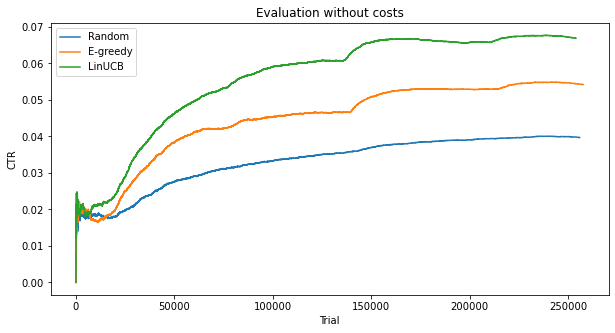

In [8]:
fig, ax = plt.subplots(1,1, figsize=(10, 5));

N = 50
ax.plot(ctr_random[N:], label='Random')
ax.plot(ctr_egreedy[N:], label='E-greedy')
ax.plot(ctr_linucb[N:], label='LinUCB')
ax.set_xlabel('Trial')
ax.set_ylabel('CTR')
ax.set_title('Evaluation without costs')


plt.legend();

In [9]:
d = len(data.events[0].user_features)

bernoulli_costs = costs.BernoulliCosts(
    feature_vector_size=d,
    probabilities=[0.5]*d,
    cost_values=[(1/d)*0.1]*d,  # Cost of all features is 10 percent of reward
    
)

In [10]:
ctr_random_costs = evaluation.evaluate(p_random, data, bernoulli_costs, stop_after=NUM_OF_TRIALS)

Random policy with BernoulliCosts
Average reward: -0.0106
Execution time: 20.8s


In [11]:
ctr_egreedy_costs = evaluation.evaluate(egreedy, data, bernoulli_costs, stop_after=NUM_OF_TRIALS)

E-greedy(epsilon=0.2) with BernoulliCosts
Average reward: 0.0025
Execution time: 26.6s


In [12]:
ctr_linucb_costs = evaluation.evaluate(linucb, data, bernoulli_costs, stop_after=NUM_OF_TRIALS)

LinUCB (alpha=0.3 with BernoulliCosts
Average reward: 0.0178
Execution time: 1.8m


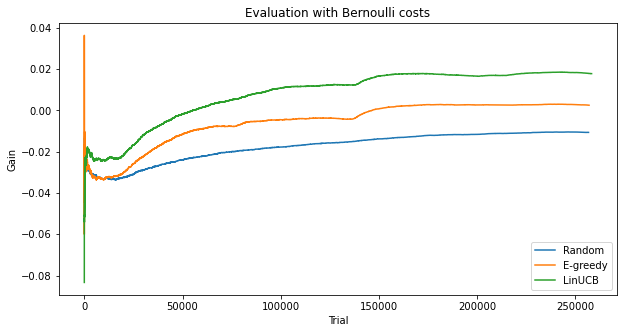

In [14]:
fig, ax = plt.subplots(1,1, figsize=(10, 5));


ax.plot(ctr_random_costs[40:], label='Random')
ax.plot(ctr_egreedy_costs, label='E-greedy')
ax.plot(ctr_linucb_costs, label='LinUCB')
ax.set_xlabel('Trial')
ax.set_ylabel('Gain')
ax.set_title('Evaluation with Bernoulli costs')
plt.legend();